In [1]:
import pandas as pd
final_csv = 'out.csv'
df = pd.read_csv(final_csv)
langs = df['lang'].unique()
print(f"Langs: {langs}")
print(f"Count by lang: {[ len(df[df['lang'] == x]) for x in langs ]}")
df.head(n=3)

Langs: ['yrk' 'ckt' 'evn']
Count by lang: [1313, 213, 974]


,Unnamed: 0,transcription,recognized,phonetic_ev,new_path,lang,mos_pred
0,0,"Myaryosiwtina,",ERYASHEKEEMA,0.343318,/home/kesha/dev/uni/kursach/refs/asr/new_audio...,yrk,2.444467
1,1,sawanyeǣǣy.,OHANDYEE,0.387097,/home/kesha/dev/uni/kursach/refs/asr/new_audio...,yrk,2.206069
2,2,"Padaniyutʃitʹq,",ASIMEOSHE,0.452688,/home/kesha/dev/uni/kursach/refs/asr/new_audio...,yrk,2.825766


In [2]:
evn_df = df[df['lang'] == 'evn']
yrk_df = df[df['lang'] == 'yrk']
ckt_df = df[df['lang'] == 'ckt']

selected_df = df
lang_name = 'all'

In [4]:
import numpy as np
phon_ev = selected_df['phonetic_ev'].to_numpy()
mos_pred = selected_df['mos_pred'].to_numpy()
""" noi_pred = selected_df['noi_pred'].to_numpy()
dis_pred = selected_df['dis_pred'].to_numpy()
col_pred = selected_df['col_pred'].to_numpy()
loud_pred = selected_df['loud_pred'].to_numpy() """

selected_metric = mos_pred
metric_name = 'MOS'

corr_coef = np.corrcoef(phon_ev, selected_metric)[0][1]

Text(0, 0, 'n: 2500\nCorrelation: -0.476')

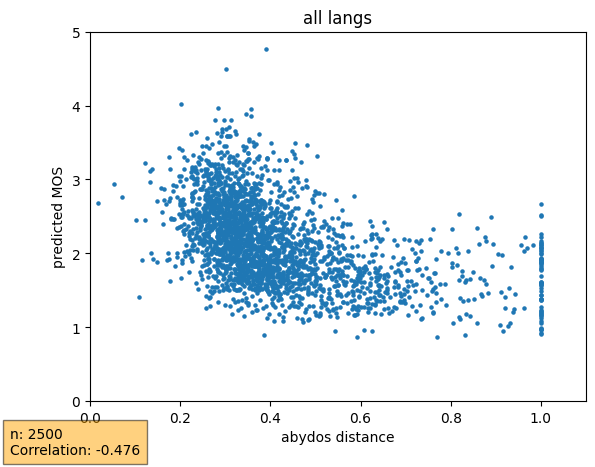

In [6]:
from matplotlib import pyplot as plt
ax, fig = plt.subplot()
plt.scatter(x=phon_ev, y=selected_metric, s=5)
plt.title(f'{lang_name} lang{"s" if lang_name == "all" else ""}')
plt.xlabel('abydos distance')
plt.ylabel(f'predicted {metric_name}')
plt.xlim((0., 1.1))
plt.ylim((0., 5.))
#plt.title('facebook/wav2vec2-base-960h model')
text = f'n: {len(phon_ev)}'
text += f'\nCorrelation: {round(corr_coef, 4)}'
plt.figtext(0, 0, text, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})